# Individual Assignment 1

##### You can work on this file directly and fill in your answers/code below. Please submit the output in .ipynb file. 

##### [Total: 12 points]


### [1 point] Student Name: Venkata Rithish Sai Reddy Yarasu


## Identify high-demand regions for car2go

car2go used to be the largest car sharing company in the world with 2,500,000 registered members as of 2017. It operated in San Diego, California using a pure electric vehicle (EV) fleet, between November 2011 and December 2016. Based on the car2go dataset collected, we simulate the travel demand in each of 50 zip codes in San Diego County. We identify high-demand regions by comparing the travel demand with a threshold, e.g., weekly demand>2,000 trips. The high-demand indicator along with demographics of zip codes are summarized in dataset “car2go_50zip.csv”. The columns in the dataset are summarized as below.

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Explanation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>zip</td>
      <td>Trip origin zip code</td>
    </tr>
    <tr>
      <td>population</td>
      <td>Population in the zip code</td>
    </tr>
      <tr>
      <td>income</td>
      <td>Median income in the zip code</td>
    </tr>
      <tr>
      <td>business</td>
      <td># of business establishments in the zip code</td>
    </tr>
      <tr>
      <td>is.high</td>
      <td>Target variable. True if the demand is high; False otherwise.</td>
    </tr>
  </tbody>
</table>

In this assignment, we aim to develop classification models to predict high demand regions, e.g., zip codes, from the dataset of car2go in San Diego, California. Hopefully, the resulting classification models can help us identify high-demand regions and design better car sharing system in other cities or countries.

### We first visualize the demand classes in a pair plot.

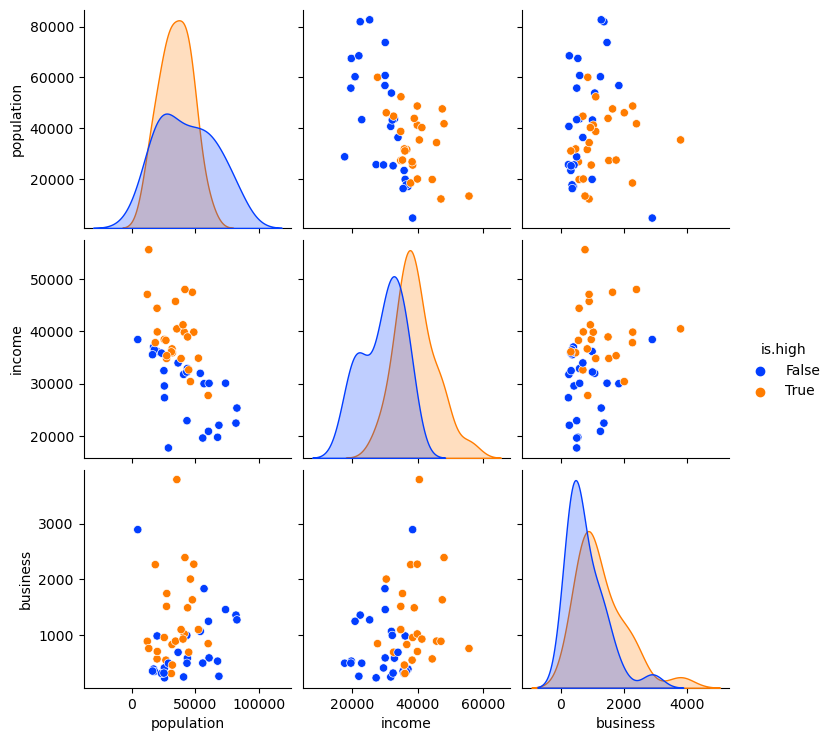

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

df0 = pd.read_csv('car2go_50zip.csv')
df = df0[['population','income','business','is.high']]
sns.pairplot(df, hue="is.high",palette="bright")
plt.show()

### Create target variable 'Demand' with classes {'High', 'Low'}

In [22]:
df0['Demand']=df0['is.high'].map({True: 'High', False: 'Low'})
df0.head()

,zip,population,income,business,is.high,Demand
0,91913,40698,31774.11071,249,False,Low
1,92029,19823,36162.37051,985,False,Low
2,91901,17034,37012.36736,391,False,Low
3,92019,43676,32897.14781,587,False,Low
4,92154,81952,22480.52708,1359,False,Low


### Randomly split the entire data into training (e.g., 50%) and test (e.g., 50%) data.

In [23]:
y = df0['Demand']
X = df0.drop(['zip','is.high','Demand'],axis=1)

# use train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=1324)

### [1 point] Train and visualize a classification tree using 'entropy' as the criterion. 
In this assignment, let's use 'entropy' and also set 'random_state=0'. For example, 'DecisionTreeClassifier(criterion='entropy',random_state=0)'.


In [24]:
# fit classification tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(criterion='entropy',random_state=0) # default setting: criterion='gini'
dtc_model=dtc.fit(X_train,y_train)

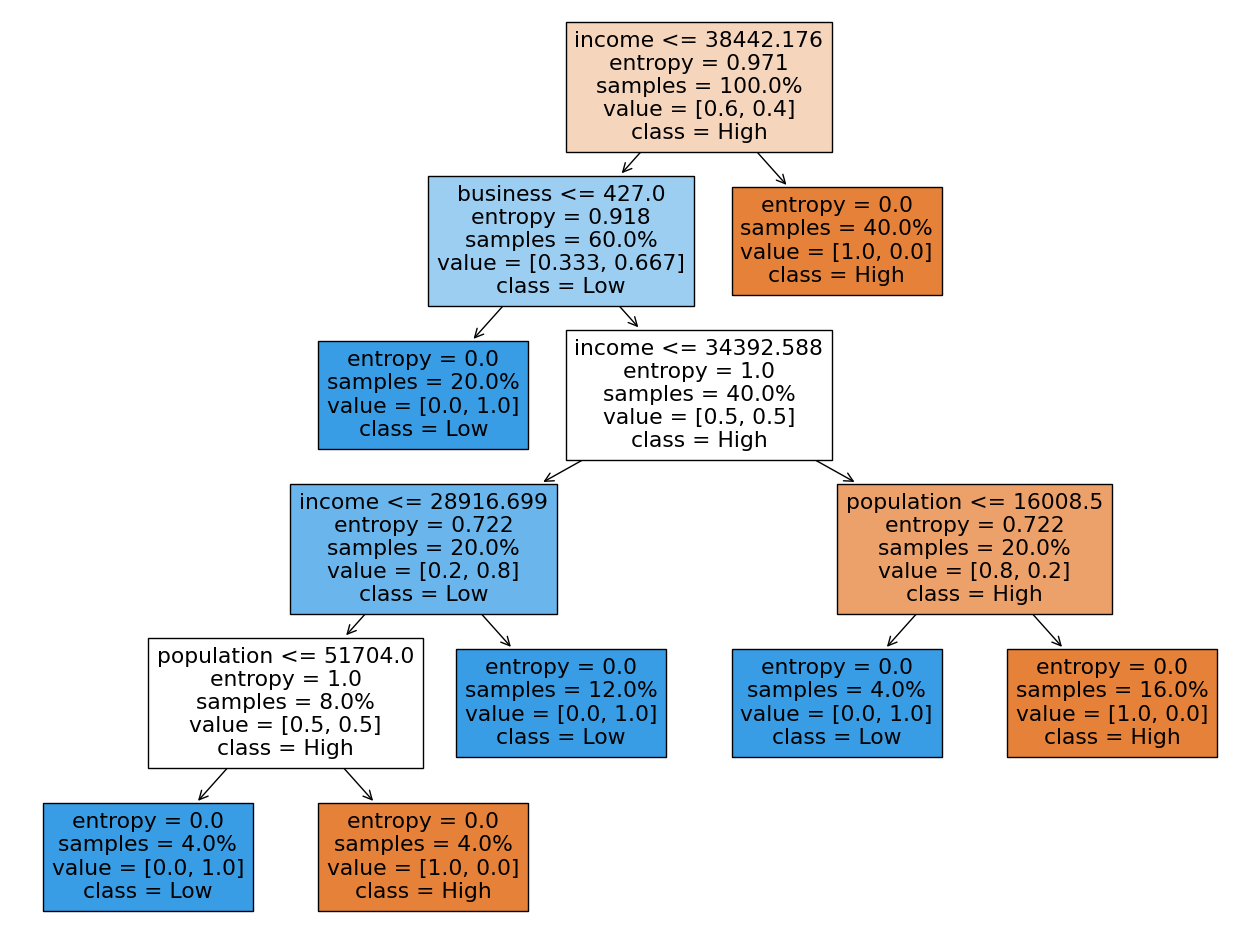

In [25]:
# Visualize classification tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn = list(X_train.columns) # specify feature names
cn = dtc_model.classes_ # specify class names
plt.figure(figsize = (16,12))
plot_tree(dtc_model, feature_names = fn, class_names = cn.tolist(), filled = True, proportion=True); # set "proportion=True" to see the values of class probability
# plt.savefig("tree.pdf")

### [1 point] Report the classification tree model's plain accuracy in the test data.

In [26]:
# evaluate in the test data
y_pred=dtc_model.predict(X_test)
print("Plain accuracy of Classification Tree: ",accuracy_score(y_test, y_pred))

Plain accuracy of Classification Tree:  0.64


### [1 point] Use cross-validation to tune the hyperparameter 'max_depth' (from max_depth=1 to max_depth=10). Report the best 'max_depth' selected.

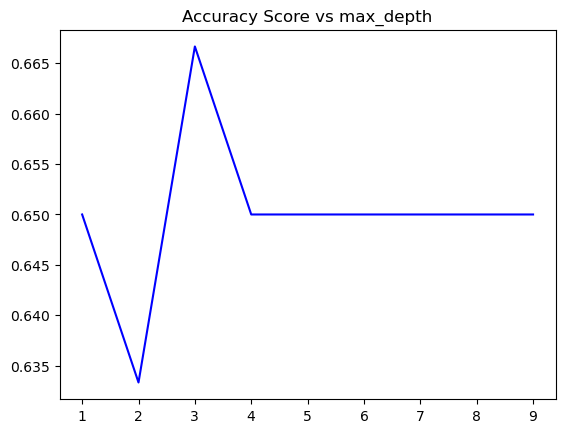

The best max_depth by cross-validation is  3


In [27]:
# tune max_depth
scores_list = []
depth_list = np.arange(1,10,1)
for depth in depth_list:
    dtc = DecisionTreeClassifier(max_depth=depth, criterion='entropy',random_state=0)
    scores = cross_val_score(dtc,X_train,y_train,cv=10,scoring='accuracy')
    scores_list.append(scores.mean())

plt.plot(depth_list, scores_list,  color = 'blue', markerfacecolor = 'black',label = 'Score')
plt.title('Accuracy Score vs max_depth')
plt.show()

index = np.argmax(np.array(scores_list))
depth_best = depth_list[index]
print('The best max_depth by cross-validation is ', depth_best)

### [1 point] Train and visualize a classification tree with the best 'max_depth' selected.

In [ ]:
# set max_depth
dtc = DecisionTreeClassifier(max_depth=4, criterion='entropy',random_state=0)
dtc_model=dtc.fit(X_train,y_train)

# Visualize classification tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn = list(X_train.columns) # specify feature names
cn = dtc_model.classes_ # specify class names
plt.figure(figsize = (16,12))
plot_tree(dtc_model, feature_names = fn, class_names = cn.tolist(), filled = True, proportion=True);

### [1 point] Report this classification tree's plain accuracy in the test data.

In [ ]:
# evaluate in the test data
y_pred=dtc_model.predict(X_test)
print("Plain accuracy of Classification Tree: ",accuracy_score(y_test, y_pred))

### [1 point] Pick the first sample in the test data and report its estimated probability of being high-demand.

In [ ]:
# the class probabilies for the first instance in the test data ------- doubt??
y_prob=dtc_model.predict_proba(X_test.iloc[[0]])
print(y_prob)

### [1 point] Show the confusion matrix of this classification tree in the test data

In [ ]:
# Evaluate using the test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dtc_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=dtc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_model.classes_)
disp.plot()
plt.show()

### [1 point] Suppose we are interested in the class of high-demand (i.e., we call it 'positive'). What are the true positive rate and the false positive rate of this classification tree?

### [2 points] Follow the sample code in 'Lec 2 ClassificationPerformance', compare the following methods by AUC evaluated under 3-fold cross-validation.
- Logistic Regression
- Linear SVM, i.e., SVC(kernel = 'linear')
- KNN with K=5
- DecisionTreeClassifier(max_depth=3,criterion = 'entropy', random_state=0)

In [ ]:
# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve

import warnings
warnings.simplefilter("ignore")

In [ ]:
# Initialize classifiers in consideration
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('SVC', SVC(kernel = 'linear')))
# models.append(('Kernel SVM', SVC(kernel = 'rbf')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
#models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=4,criterion = 'entropy',random_state=0)))
#models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy')))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['AUC Mean'], ascending=False)

### [1 point] After selecting the best model, report its final out-of-sample performance measured by AUC.
[Hint: if the model is called 'clf', then use 'roc_auc_score(y, clf.predict_proba(X)[:, 1])' for binary classification because the 2nd column is the scores for the 'positive' class.]

In [ ]:
roc_auc_score(y, SVC.predict_proba(X)[:, 1])